<a href="https://colab.research.google.com/github/melly2002/ipython-in-depth/blob/master/Copy_of_Big_Data_Coursework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Evaluation and modeling of complex data**
##**Coursework 1: Understanding Big Data**

###**Preparing datasets**
Downloading dataset

In [ ]:
!wget https://myfiles.uni-bayreuth.de/filr/public-link/file-download/043490a487f9abb3018820fca19c6cbe/78109/-8507302463335948875/CDC_mort_dataset.zip

--2023-06-11 18:26:58--  https://myfiles.uni-bayreuth.de/filr/public-link/file-download/043490a487f9abb3018820fca19c6cbe/78109/-8507302463335948875/CDC_mort_dataset.zip
Resolving myfiles.uni-bayreuth.de (myfiles.uni-bayreuth.de)... 132.180.16.239
Connecting to myfiles.uni-bayreuth.de (myfiles.uni-bayreuth.de)|132.180.16.239|:443... connected.
HTTP request sent, awaiting response... 302 
Location: /ssf/s/readFile/share/78109/-8507302463335948875/publicLink/CDC_mort_dataset.zip [following]
--2023-06-11 18:26:58--  https://myfiles.uni-bayreuth.de/ssf/s/readFile/share/78109/-8507302463335948875/publicLink/CDC_mort_dataset.zip
Reusing existing connection to myfiles.uni-bayreuth.de:443.
HTTP request sent, awaiting response... 200 
Length: 14048131 (13M) [application/zip]
Saving to: ‘CDC_mort_dataset.zip’

CDC_mort_dataset.zi 100%[===================>]  13.40M  7.35MB/s    in 1.8s    

2023-06-11 18:27:01 (7.35 MB/s) - ‘CDC_mort_dataset.zip’ saved [14048131/14048131]



Unzip the dataset to folder called data

In [ ]:
!unzip CDC_mort_dataset.zip

Archive:  CDC_mort_dataset.zip
  inflating: data/dataset.parq       
  inflating: data/mapping.pkl        


Loading dataset and label mappings

In [ ]:
import pickle
import pandas as pd

In [ ]:
df = pd.read_parquet("data/dataset.parq")
with open("data/mapping.pkl", "rb") as _file:
  sex, education, marital_status, manner_of_death, method_of_disposition, occupation = pickle.load(_file)

###**Inspecting dataset and mapping**
First 10 rows of the dataset. As seen below, our dataset contains 19 columns, nine describing the patients' characteristics and 10 containing the disease code. The -1 in the data denotes that the data is unknown or doesn't exist, e.g. the occupation might be unknown, or the patient might have fewer than five diseases. Additionally, `cause_of_death_1` is the primary disease that causes demise.

In [ ]:
df.iloc[:10, :]

,uuid,sex,age,education,occupation,marital_status,month_of_death,manner_of_death,method_of_disposition,cause_of_death_1_chapter,cause_of_death_1_code,cause_of_death_2_chapter,cause_of_death_2_code,cause_of_death_3_chapter,cause_of_death_3_code,cause_of_death_4_chapter,cause_of_death_4_code,cause_of_death_5_chapter,cause_of_death_5_code
0,28a00413,1,80,6,19,3,1,7,1,9,50,9,51,9,51,2,85,13,48
1,7242acb8,0,68,2,4,1,1,7,1,10,44,5,17,-1,-1,-1,-1,-1,-1
2,a75a3499,1,54,2,-1,1,1,1,1,6,93,19,75,20,65,18,55,9,49
3,1d078a60,0,75,2,3,3,1,7,1,9,71,10,44,5,17,5,17,-1,-1
4,cb9d4dd8,0,85,0,0,0,1,7,0,2,16,-1,-1,-1,-1,-1,-1,-1,-1
5,eb0860a4,0,62,0,3,0,1,7,0,2,26,5,10,4,43,5,17,-1,-1
6,3f6b75b7,1,76,3,14,0,1,7,0,2,56,4,43,-1,-1,-1,-1,-1,-1
7,c402975c,1,80,2,-1,2,1,7,1,9,64,13,6,-1,-1,-1,-1,-1,-1
8,4000e3d9,1,75,2,4,1,1,7,0,4,43,5,1,-1,-1,-1,-1,-1,-1
9,f6b604b1,0,82,2,7,1,1,7,1,18,62,9,64,9,67,18,26,14,19


Inspecting labels mappings

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def MyHist(data, bin_edges):
  bin_counts = np.zeros(len(bin_edges))
  for datum in data:
    for edge in range(0, len(bin_edges)-1):
      if datum < bin_edges[edge]:
        bin_counts[edge] +- 1
        break
  plt.bar(bin_edges,bin_counts,width=10)
  return bin_counts

In [ ]:
sex

,index,label
0,0,M
1,1,F


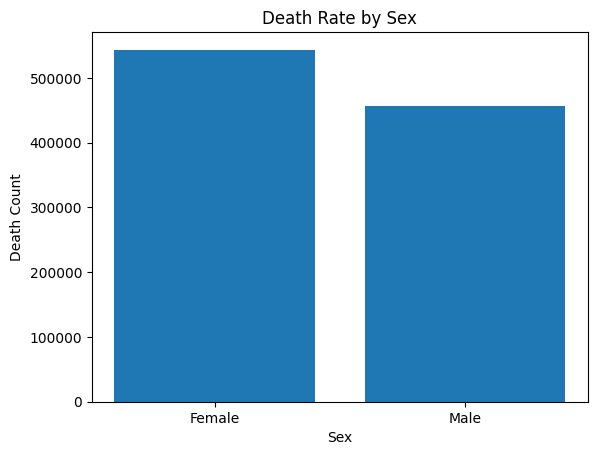

The sex with the highest death rate is: Female


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})

death_rate_by_sex = df['sex'].value_counts()

plt.bar(death_rate_by_sex.index, death_rate_by_sex.values)
plt.xlabel("Sex")
plt.ylabel("Death Count")
plt.title("Death Rate by Sex")
plt.show()

highest_death_rate_sex = death_rate_by_sex.idxmax()
print("The sex with the highest death rate is:", highest_death_rate_sex)


71.461087


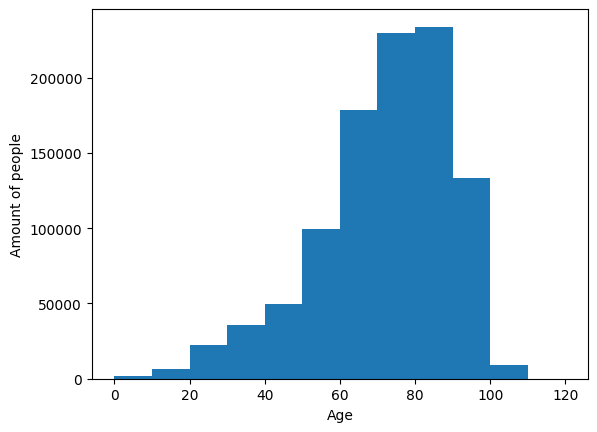

With regard to all the different causes of death, it is safe to say that there are a lot of elderly people who struggle with diseases


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet("data/dataset.parq")
averageAge = df['age'].mean()
print(averageAge)

ages = df['age'].values.tolist()
bin_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

plt.hist(ages, bins=bin_list)
plt.xlabel("Age")
plt.ylabel("Amount of people")
plt.show()

print("With regard to all the different causes of death, it is safe to say that there are a lot of elderly people who struggle with diseases")


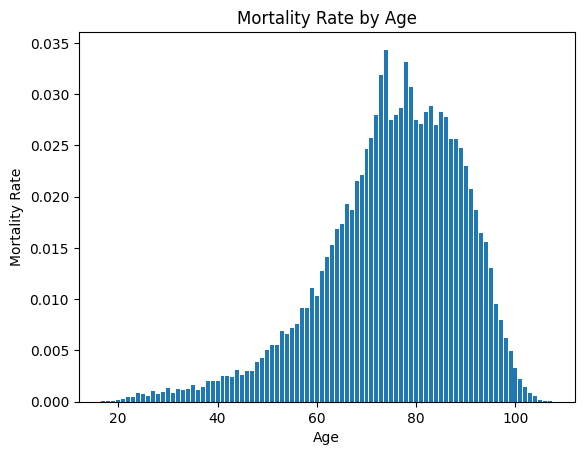

The age with the highest mortality rate is 74.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_healthcare = df.loc[df['occupation'] == 19]

age_counts = df_healthcare['age'].value_counts()

age_mortality_rate = age_counts / df_healthcare.shape[0]

highest_mortality_age = age_mortality_rate.idxmax()

plt.bar(age_mortality_rate.index, age_mortality_rate.values)
plt.xlabel('Age')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate by Age')
plt.show()

print(f"The age with the highest mortality rate is {highest_mortality_age}.")


In [ ]:
education

,index,label
0,0,8th grade or less
1,1,"9 - 12th grade, no diploma"
2,2,high school graduate or GED completed
3,3,"some college credit, but no degree"
4,4,Associate degree
5,5,Bachelor’s degreeA
6,6,Master’s degree
7,7,Doctorate or professional degree
8,-1,Unknown


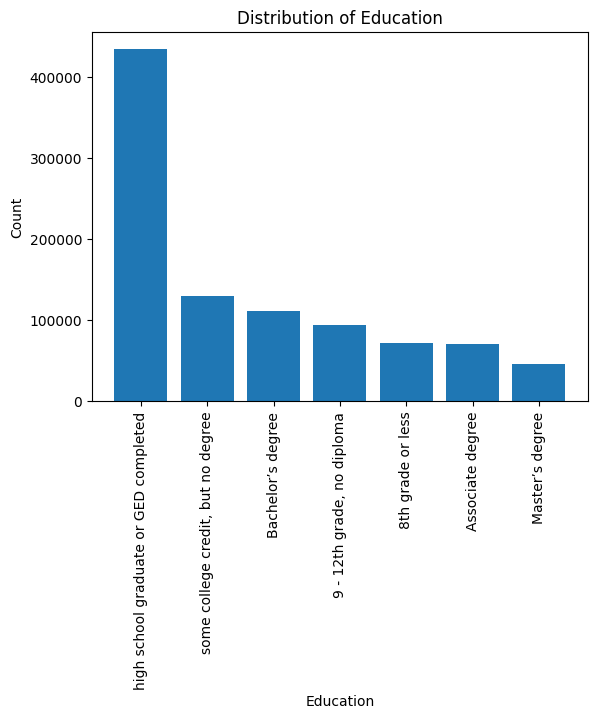

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_parquet("data/dataset.parq")
averageAge = df['age'].mean()
additional_data = pd.DataFrame({
    'index': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'label': ['8th grade or less', '9 - 12th grade, no diploma', 'high school graduate or GED completed',
              'some college credit, but no degree', 'Associate degree', 'Bachelor’s degree', 'Master’s degree',
              'Doctorate or professional degree', 'Unknown']
})
merged_df = df.merge(additional_data, left_on='education', right_on='index')
education_counts = merged_df['label'].value_counts()
plt.bar(education_counts.index, education_counts.values)
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Distribution of Education")
plt.xticks(rotation=90)
plt.show()


<BarContainer object of 22 artists>

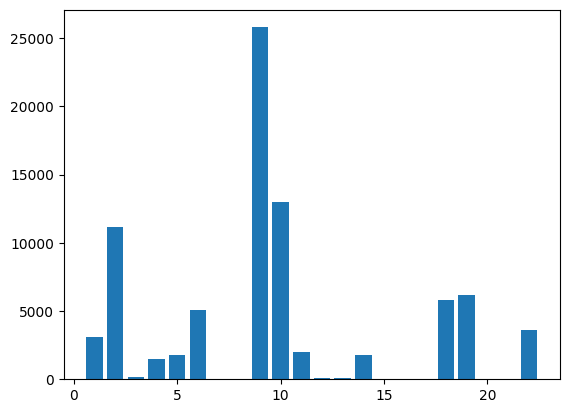

In [ ]:
#What do people in healthcare/social die of?
df_healthcare = df.loc[(df['occupation'] == 15), :]

count = [0 for _ in range(22)]
for row in df_healthcare.to_numpy():
  for i in range(len(count)):
    if i + 1 == row[9]:
      count[i] += 1

plt.bar(range(1, len(count) + 1, 1), count)

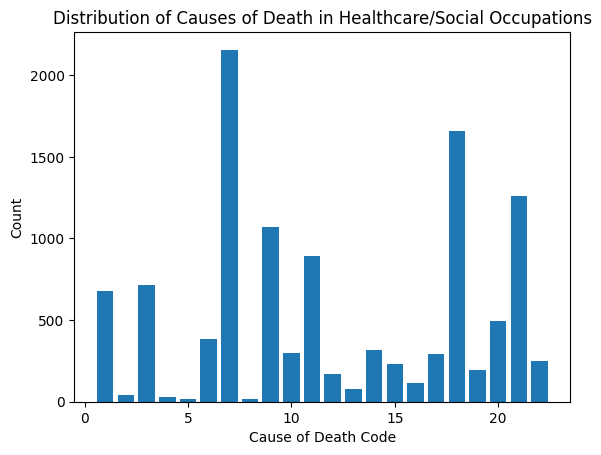

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_healthcare = df.loc[df['occupation'] == 19]

count = [0 for _ in range(22)]
for row in df_healthcare.to_numpy():
    for i in range(len(count)):
        if i + 1 == row[10]:
            count[i] += 1

plt.bar(range(1, len(count) + 1), count)
plt.xlabel('Cause of Death Code')
plt.ylabel('Count')
plt.title('Distribution of Causes of Death in Healthcare/Social Occupations')
plt.show()


In [ ]:
marital_status

,index,label
0,0,"Never married, single"
1,1,Married
2,2,Widowed
3,3,Divorced
4,-1,Marital Status unknown


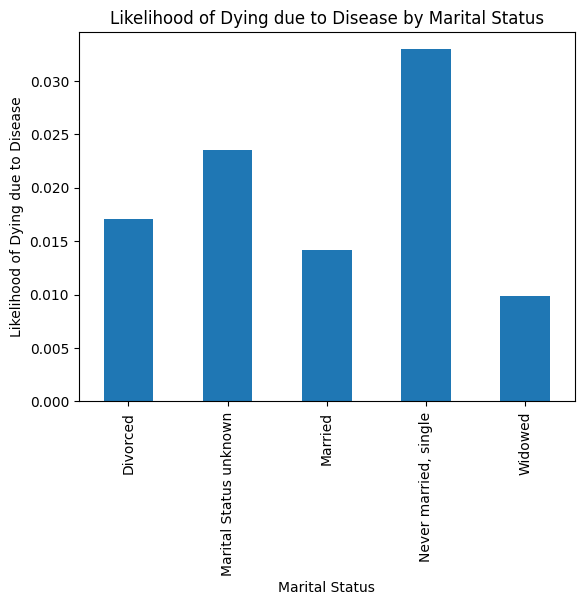

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_healthcare = df.loc[df['occupation'] == 19]

marital_status_counts = df_healthcare['marital_status'].value_counts()
marital_status_deaths = df_healthcare.loc[df_healthcare['cause_of_death_1_code'] == 1, 'marital_status'].value_counts()

marital_status_labels = {
    0: 'Never married, single',
    1: 'Married',
    2: 'Widowed',
    3: 'Divorced',
    -1: 'Marital Status unknown'
}

marital_status_counts = marital_status_counts.rename(index=marital_status_labels)
marital_status_deaths = marital_status_deaths.rename(index=marital_status_labels)

likelihood_of_death = marital_status_deaths / marital_status_counts

likelihood_of_death.plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Likelihood of Dying due to Disease')
plt.title('Likelihood of Dying due to Disease by Marital Status')
plt.show()


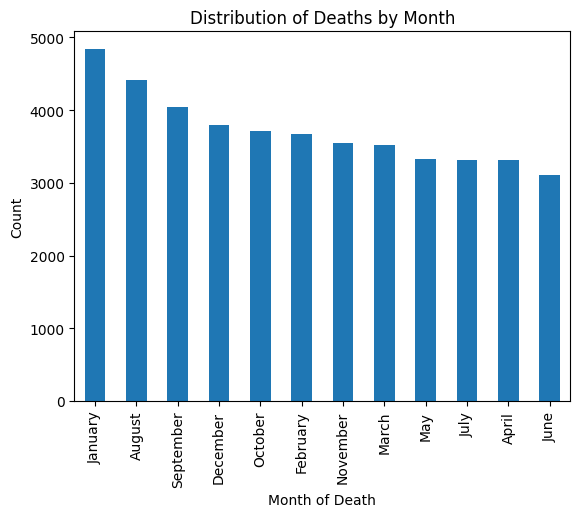

The month with the highest death rate is January.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_healthcare = df.loc[df['occupation'] == 19]

month_of_death_counts = df_healthcare['month_of_death'].value_counts()

month_labels = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

month_of_death_counts = month_of_death_counts.rename(index=month_labels)

highest_death_month = month_of_death_counts.idxmax()

month_of_death_counts.plot(kind='bar')
plt.xlabel('Month of Death')
plt.ylabel('Count')
plt.title('Distribution of Deaths by Month')
plt.show()

print(f"The month with the highest death rate is {highest_death_month}.")


In [ ]:
manner_of_death

,index,label
0,0,Accident
1,1,Suicide
2,2,Homicide
3,3,Pending investigation
4,4,Could not determine
5,5,Self-Inflicted
6,6,Natural
7,-1,Not specified


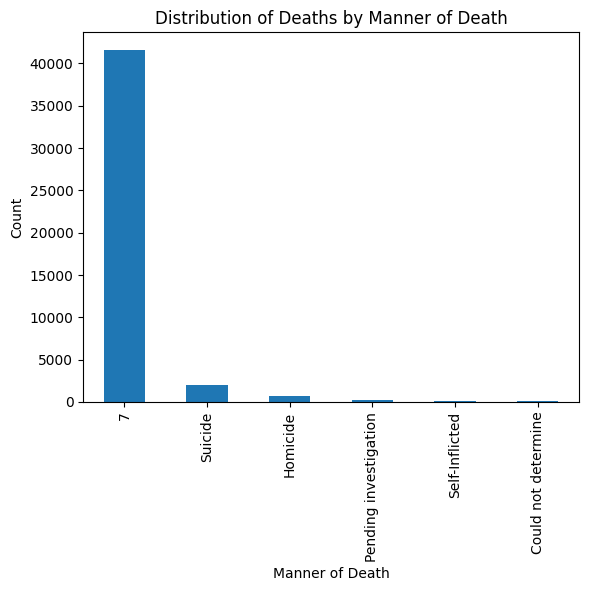

The manner of death with the highest count is 7.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_healthcare = df.loc[df['occupation'] == 19]

manner_of_death_counts = df_healthcare['manner_of_death'].value_counts()

manner_of_death_labels = {
    0: 'Accident',
    1: 'Suicide',
    2: 'Homicide',
    3: 'Pending investigation',
    4: 'Could not determine',
    5: 'Self-Inflicted',
    6: 'Natural',
    -1: 'Not specified'
}

manner_of_death_counts = manner_of_death_counts.rename(index=manner_of_death_labels)

highest_death_manner = manner_of_death_counts.idxmax()

manner_of_death_counts.plot(kind='bar')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.title('Distribution of Deaths by Manner of Death')
plt.show()

print(f"The manner of death with the highest count is {highest_death_manner}.")


In [ ]:
method_of_disposition

,index,label
0,0,Burial
1,1,Cremation
2,2,Donation
3,3,Entombment
4,4,Other
5,5,Removal from jurisdiction
6,-1,Unknown


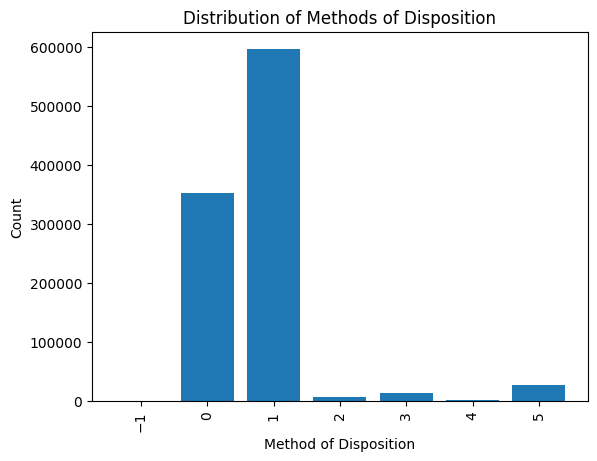

With regard to all the different methods of Disposition, it is safe to safe that cremation is the preferred method


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet("data/dataset.parq")

method_counts = df['method_of_disposition'].value_counts()

plt.bar(method_counts.index, method_counts.values)
plt.xlabel("Method of Disposition")
plt.ylabel("Count")
plt.title("Distribution of Methods of Disposition")
plt.xticks(rotation=90)
plt.show()

print("With regard to all the different methods of Disposition, it is safe to safe that cremation is the preferred method")

In [ ]:
occupation

,index,label
0,0,"AGRICULTURE, FORESTRY, FISHING & HUNTING IND."
1,1,MINING IND.
2,2,UTILITIES IND.
3,3,CONSTRUCTION IND.
4,4,MANUFACTURING IND.
5,5,WHOLESALE TRADE IND.
6,6,RETAIL TRADE IND.
7,7,TRANSPORTATION & WAREHOUSING IND.
8,8,INFORMATION IND.
9,9,FINANCE & INSURANCE IND.


71.461087


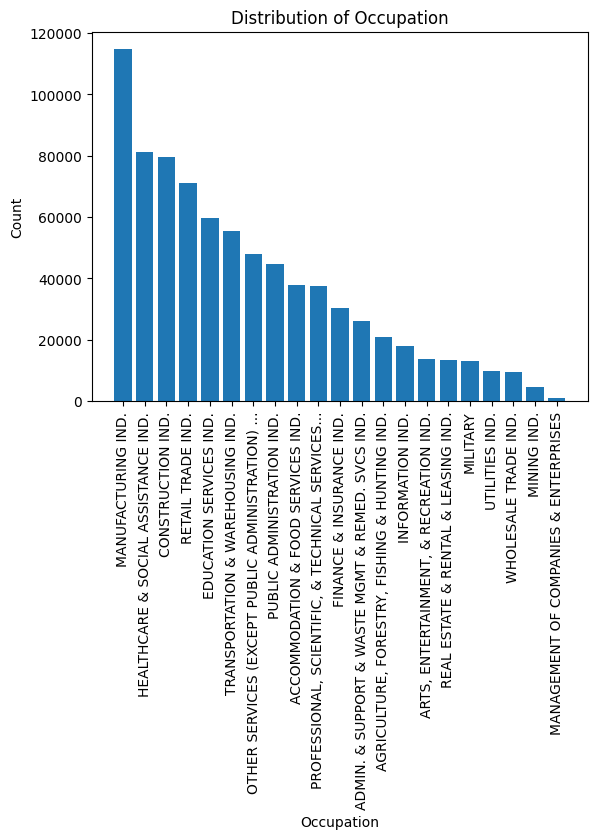

With regard to all the different types of occuation, it is safe to say that the manufacturing industry is the most popular


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet("data/dataset.parq")
averageAge = df['age'].mean()
print(averageAge)

occupations = df['occupation'].values.tolist()

additional_data = pd.DataFrame({
    'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'label': ['AGRICULTURE, FORESTRY, FISHING & HUNTING IND.', 'MINING IND.', 'UTILITIES IND.',
              'CONSTRUCTION IND.', 'MANUFACTURING IND.', 'WHOLESALE TRADE IND.', 'RETAIL TRADE IND.',
              'TRANSPORTATION & WAREHOUSING IND.', 'INFORMATION IND.', 'FINANCE & INSURANCE IND.',
              'REAL ESTATE & RENTAL & LEASING IND.', 'PROFESSIONAL, SCIENTIFIC, & TECHNICAL SERVICES...',
              'MANAGEMENT OF COMPANIES & ENTERPRISES', 'ADMIN. & SUPPORT & WASTE MGMT & REMED. SVCS IND.',
              'EDUCATION SERVICES IND.', 'HEALTHCARE & SOCIAL ASSISTANCE IND.',
              'ARTS, ENTERTAINMENT, & RECREATION IND.', 'ACCOMMODATION & FOOD SERVICES IND.',
              'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION) ...', 'PUBLIC ADMINISTRATION IND.', 'MILITARY',
              'OTHER--MISC, MISSING']
})

merged_df = df.merge(additional_data, left_on='occupation', right_on='index')

occupation_counts = merged_df['label'].value_counts()

plt.bar(occupation_counts.index, occupation_counts.values)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Distribution of Occupation")
plt.xticks(rotation=90)
plt.show()

print("With regard to all the different types of occuation, it is safe to say that the manufacturing industry is the most popular")


###**Example**
Looking at primary cause of death distribution throughout the population.

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
count = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [ ]:
for row in df.to_numpy():
  for i in range(len(count)):
    if i + 1 == row[9]:
      count[i] += 1

<BarContainer object of 22 artists>

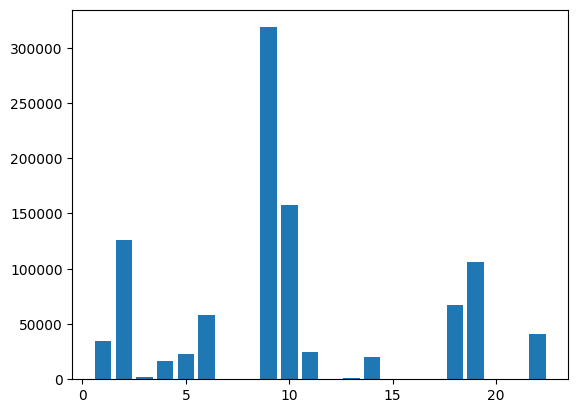

In [ ]:
plt.bar(range(1, len(count) + 1, 1), count)

Looking at specific disease distribution with a specific chapter throughout the population.

In [ ]:
count_chapter_IX = [0 for _ in range(100)]

In [ ]:
for row in df.to_numpy():
  if row[9] != 9:
    continue

  for i in range(len(count_chapter_IX)):
    if i  == row[10]:
      count_chapter_IX[i] += 1

<BarContainer object of 100 artists>

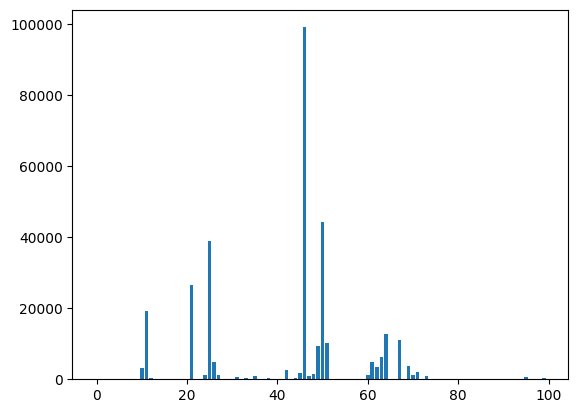

In [ ]:
plt.bar(range(len(count_chapter_IX)), count_chapter_IX)

In [ ]:
count_chapter_IX.index(max(count_chapter_IX))

46